<a href="https://colab.research.google.com/github/swarubm/Intro-to-EDA/blob/main/DC_4_Outlier_Removal_using_IQR_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
data = pd.read_csv("scholarship.csv")

In [5]:
data.head()

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0


/tmp/ipython-input-828206924.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["scholarship_exam_marks"])


<Axes: xlabel='scholarship_exam_marks', ylabel='Density'>

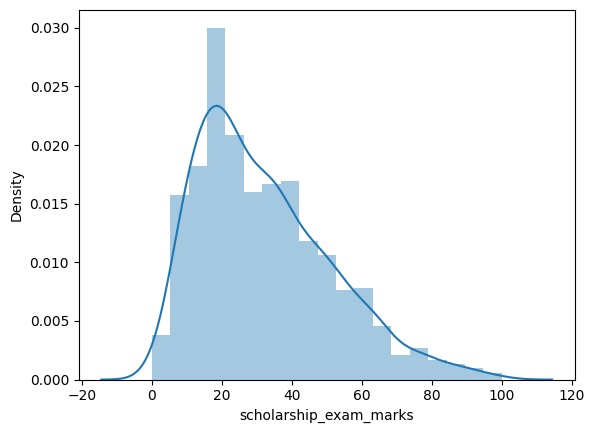

In [6]:
sns.distplot(data["scholarship_exam_marks"])

In [7]:
data["scholarship_exam_marks"].skew()

np.float64(0.8356419499466834)

In [8]:
data["scholarship_exam_marks"].describe()

,scholarship_exam_marks
count,1000.000000
mean,32.225000
std,19.130822
min,0.000000
25%,17.000000
50%,28.000000
75%,44.000000
max,100.000000


<Axes: ylabel='scholarship_exam_marks'>

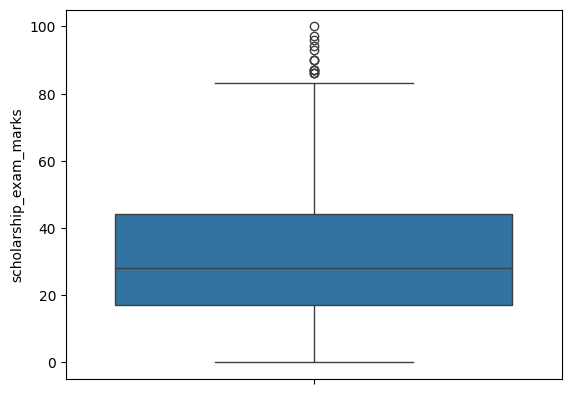

In [9]:
sns.boxplot(data["scholarship_exam_marks"])

In [15]:
Q1 = percentile25 = data["scholarship_exam_marks"].quantile(0.25)
Q3 = percentile75 = data["scholarship_exam_marks"].quantile(0.75)

In [16]:
Q1

np.float64(17.0)

In [17]:
Q3

np.float64(44.0)

In [20]:
IQR = Q3 - Q1

In [22]:
min

np.float64(-23.5)

In [23]:
max

np.float64(84.5)

In [19]:
min = Q1 - 1.5*IQR
max = Q3 + 1.5*IQR

In [13]:
#trimming
new_data = data[(data["scholarship_exam_marks"]>min) & (data["scholarship_exam_marks"]<max)]


In [25]:
new_data

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
998,86.2,46,1


In [27]:
df_new = new_data

/tmp/ipython-input-2880843552.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["scholarship_exam_marks"])
/tmp/ipython-input-2880843552.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new["scholarship_exam_marks"])


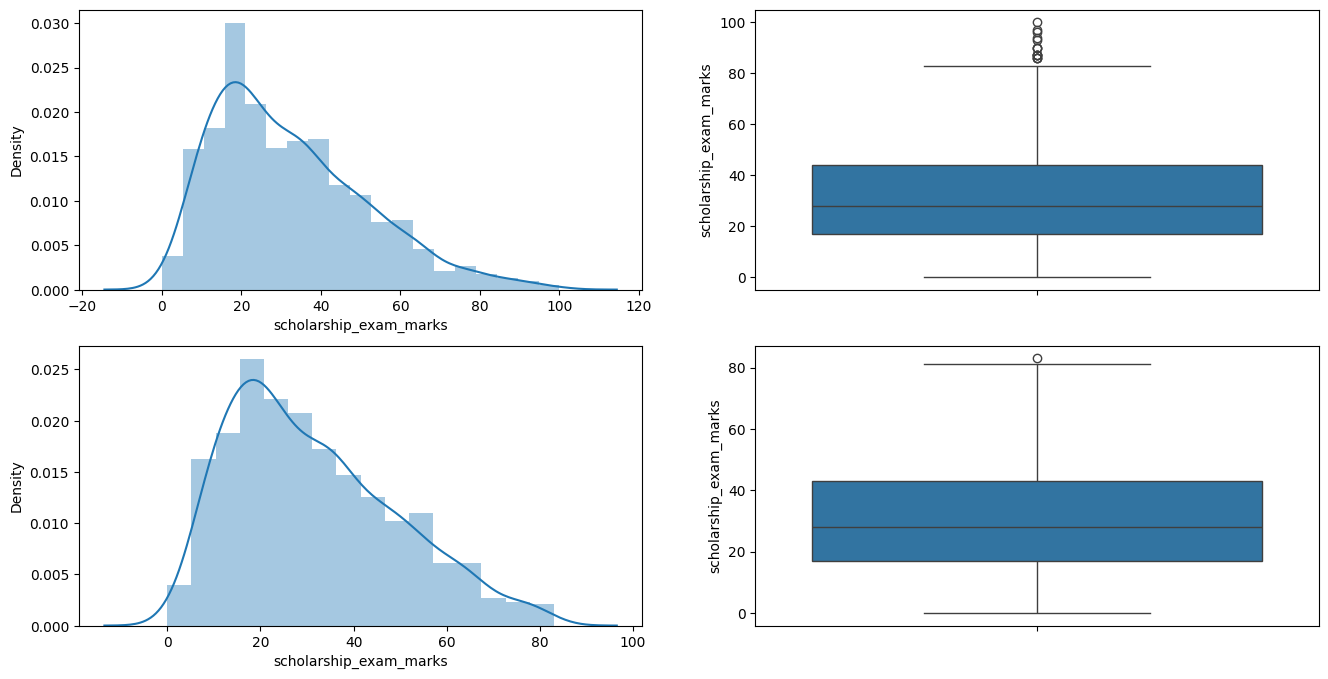

In [29]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data["scholarship_exam_marks"])

plt.subplot(2,2,2)
sns.boxplot(data["scholarship_exam_marks"])

plt.subplot(2,2,3)
sns.distplot(df_new["scholarship_exam_marks"])

plt.subplot(2,2,4)
sns.boxplot(df_new["scholarship_exam_marks"])

plt.show()

In [30]:
#capping
new_data2 = data.copy()
new_data2["scholarship_exam_marks"] = np.where(data["scholarship_exam_marks"]>max,
         max,
         np.where(data["scholarship_exam_marks"]<min,min, data["scholarship_exam_marks"]))
new_data2.shape

(1000, 3)

In [31]:
new_data2["scholarship_exam_marks"].describe()

,scholarship_exam_marks
count,1000.000000
mean,32.136500
std,18.865419
min,0.000000
25%,17.000000
50%,28.000000
75%,44.000000
max,84.500000
